# <center>Chronic Kidney Disease Prediction</center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import auc, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Chronic-Kidney-Disease-Prediction/kidney_disease.csv')

In [3]:
df.shape

(400, 26)

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
cleanup = {
    "rbc":{"normal":1,"abnormal":0},
    "pc":{"normal":1,"abnormal":0},
    "pcc":{"present":1,"notpresent":0},
    "ba":{"present":1,"notpresent":0},
    "htn":{"yes":1,"no":0},
    "dm":{"yes":1,"no":0},
    "cad":{"yes":1,"no":0},
    "appet":{"good":1,"poor":0},
    "pe":{"yes":1,"no":0},
    "ane":{"yes":1,"no":0}
}

In [8]:
df.replace(cleanup,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
df['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64

In [11]:
df['pcv'].replace(['\t43', '\t?'], [43, np.NaN], inplace= True)
df['pcv'] = df['pcv'].astype('float64')

In [12]:
df['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [13]:
df['wc'].replace('\t?', np.NaN, inplace= True)
df['wc'] = df['wc'].astype('float64')

In [14]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: rc, dtype: int64

In [15]:
df['rc'].replace('\t?', np.NaN, inplace= True)
df['rc'] = df['rc'].astype('float64')

In [16]:
df['dm'].value_counts()

0        258
1        134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [17]:
df['dm'].replace(['\tno', '\tyes', ' yes'], [0, 1, 1], inplace= True)

In [18]:
df['cad'].value_counts()

0       362
1        34
\tno      2
Name: cad, dtype: int64

In [19]:
df['cad'].replace('\tno', 0, inplace=True)

In [20]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [21]:
df['classification'].replace('ckd\t', 'ckd', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [23]:
for column in df:
    if df[column].isna().sum() != 0 and df[column].dtype != 'object':
        df[column].fillna(df[column].mean(), inplace=True)

In [24]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [25]:
df.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,...,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,0.308983,0.383750,0.306755,0.228199,...,2.716171,8.151081,2523.219976,0.840314,0.482023,0.474518,0.279166,0.404077,0.392677,0.357440
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,0.810484,0.773134,0.000000,0.000000,...,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.526437,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,...,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


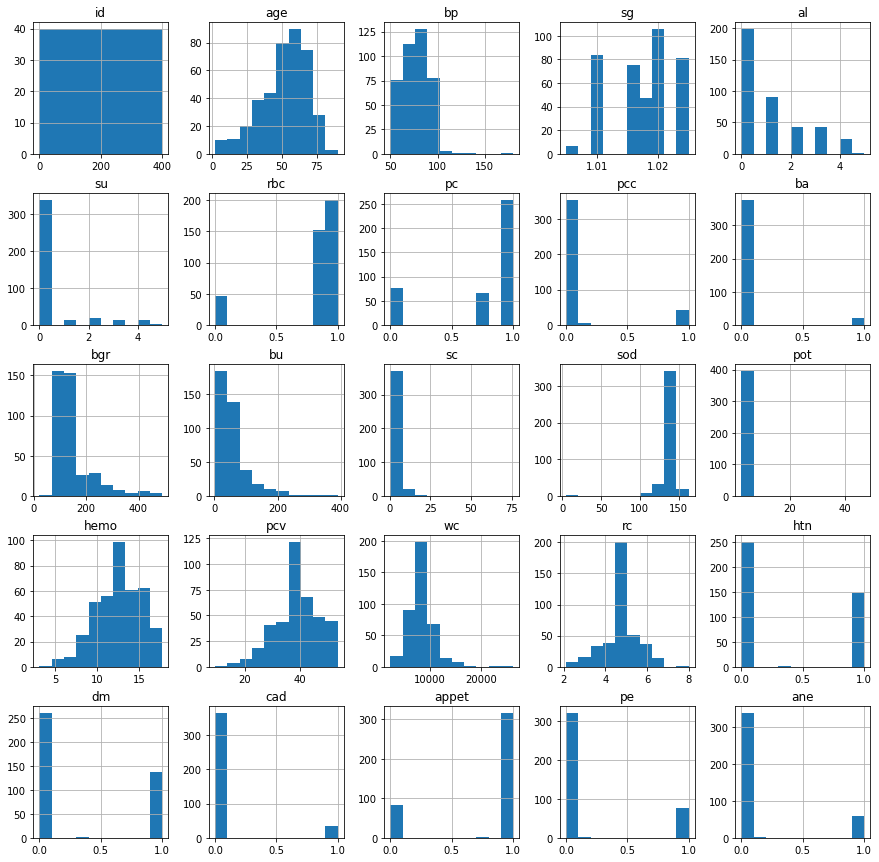

In [26]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
g = df.hist(ax=ax)

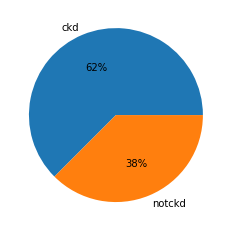

In [27]:
plt.pie(df['classification'].value_counts(),labels=df['classification'].value_counts().index,autopct='%.0f%%')
plt.show()

In [28]:
df['classification'].replace(['ckd', 'notckd'], [1,0], inplace=True)

In [29]:
df['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

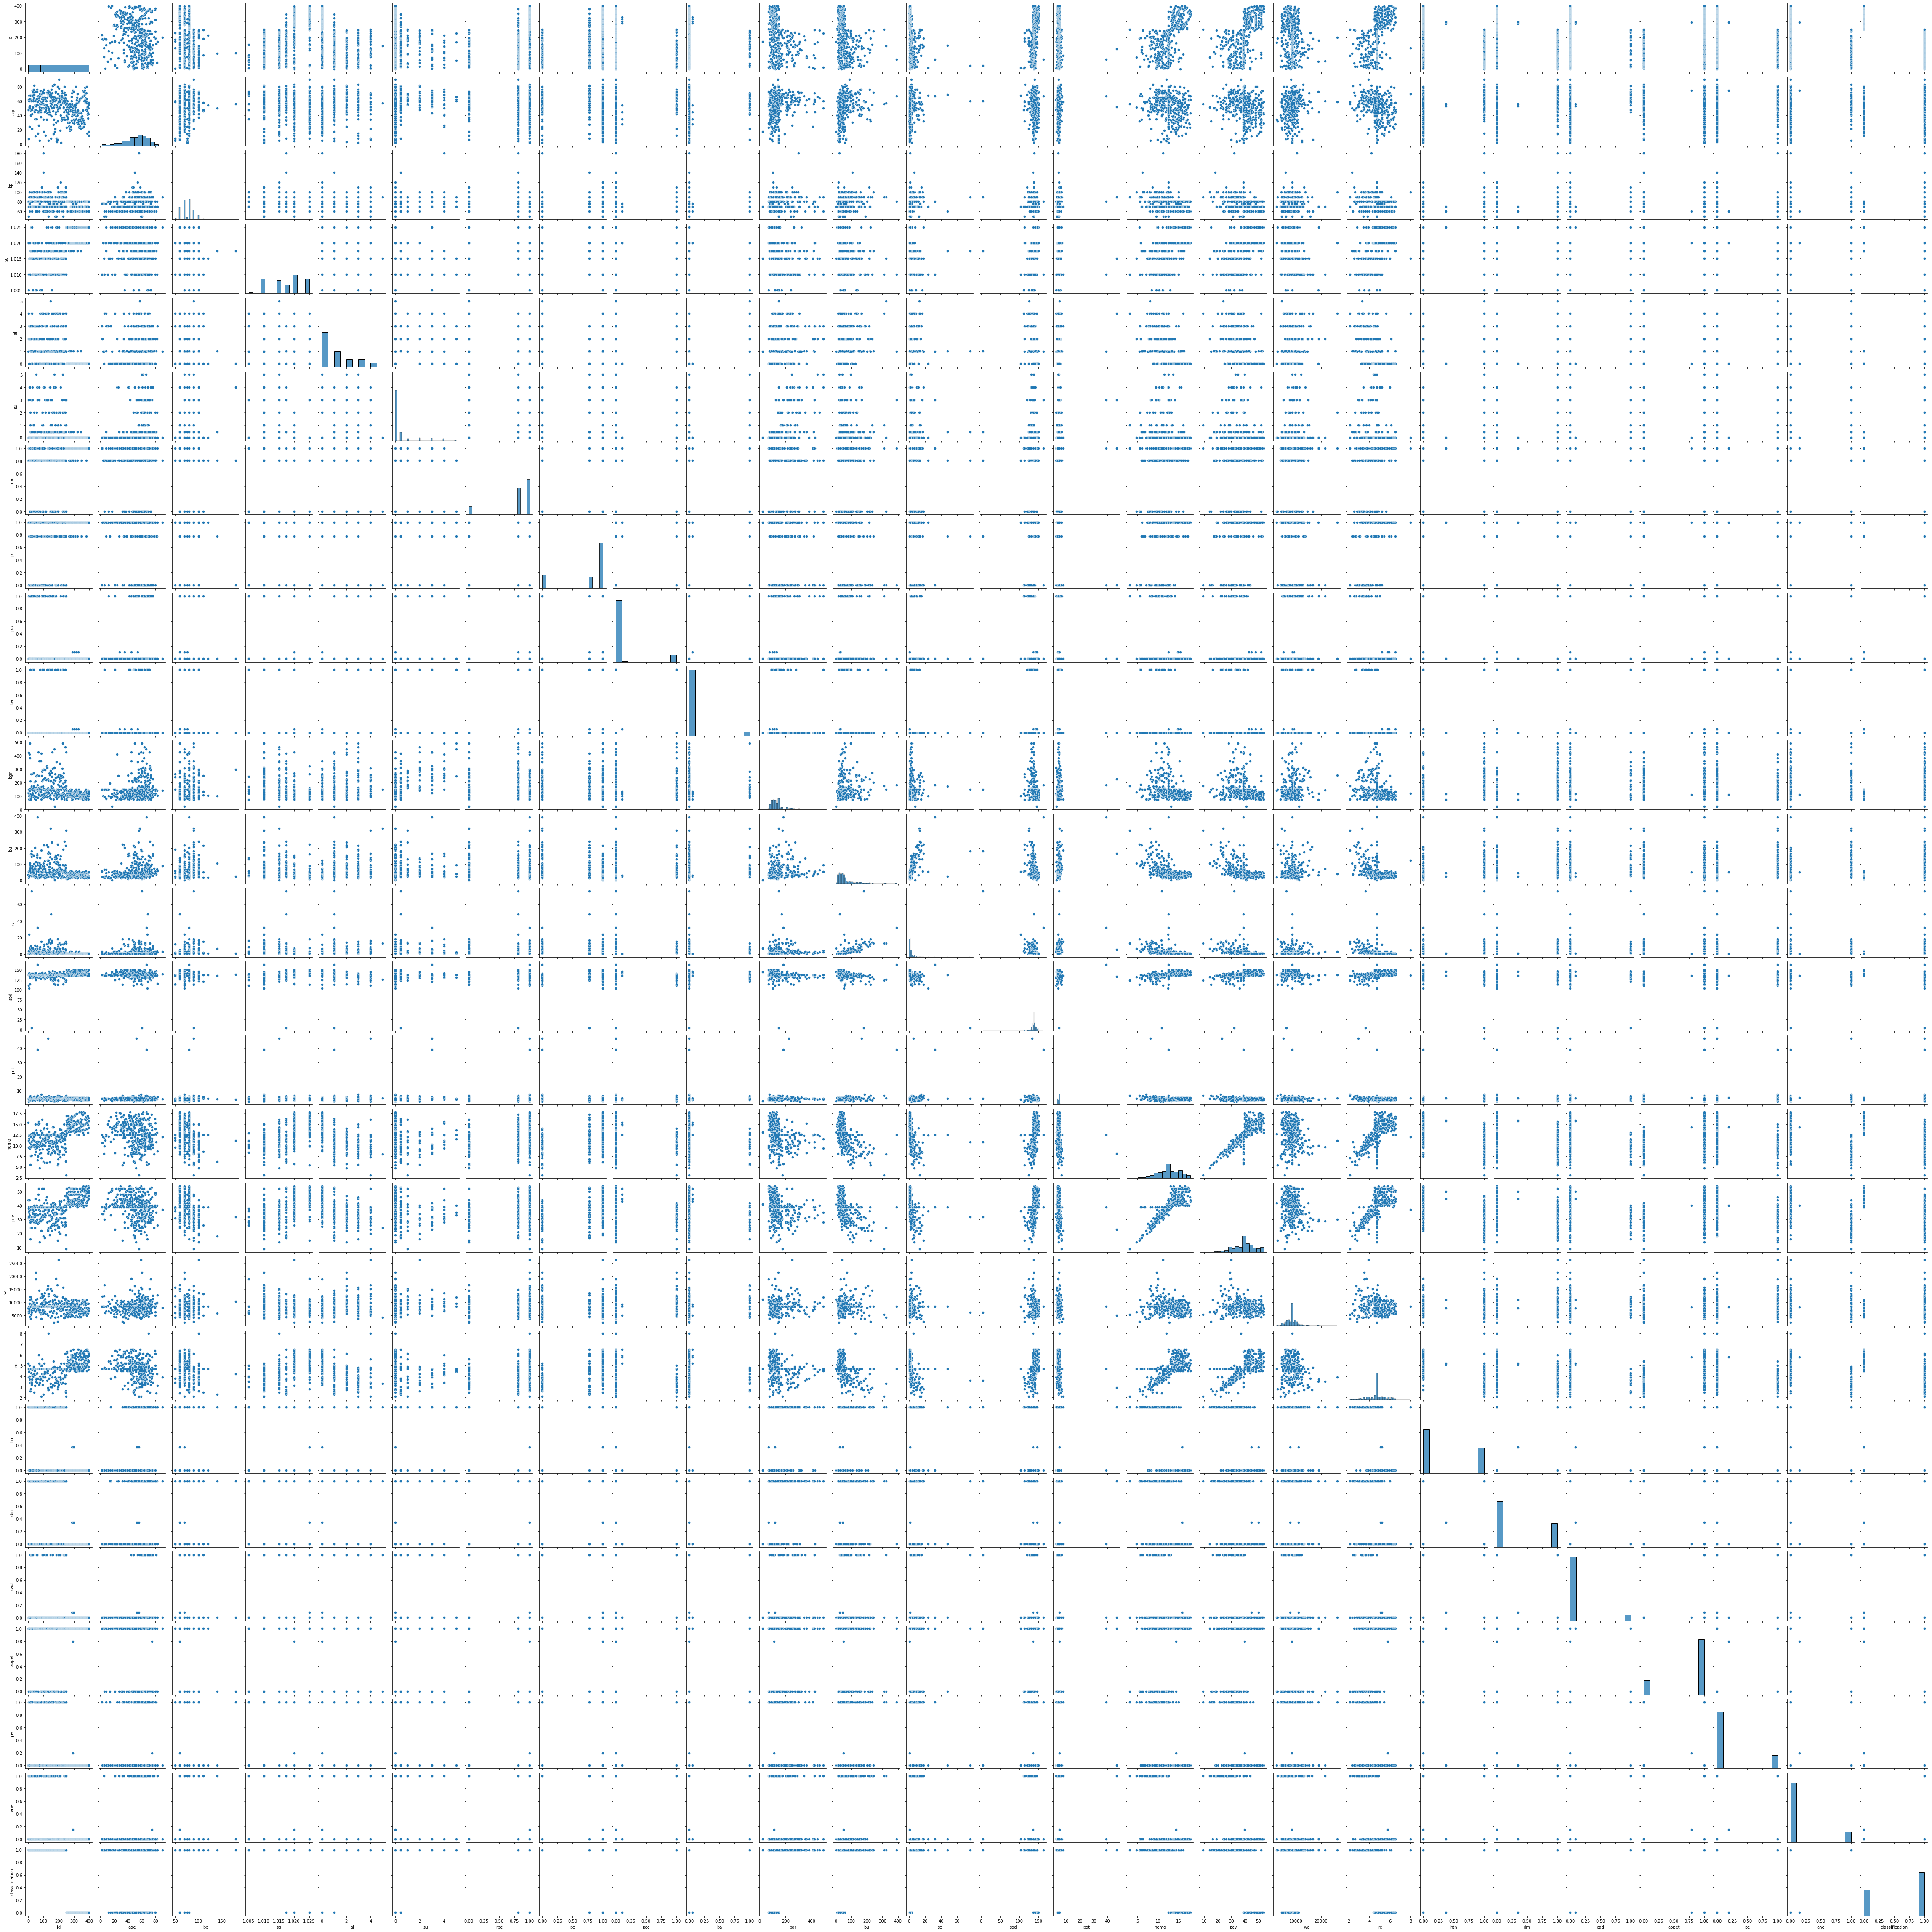

In [30]:
sns.pairplot(df)

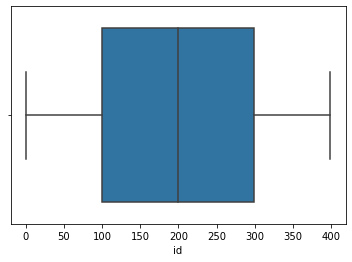

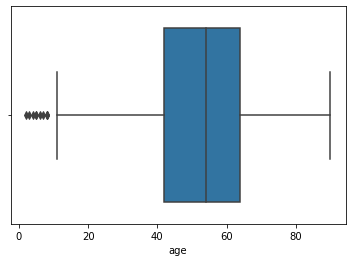

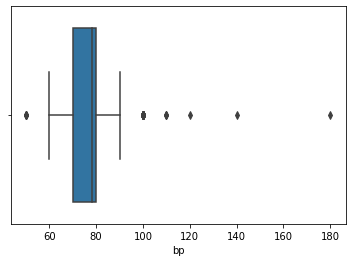

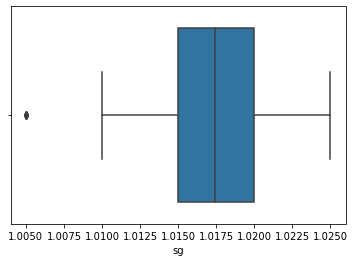

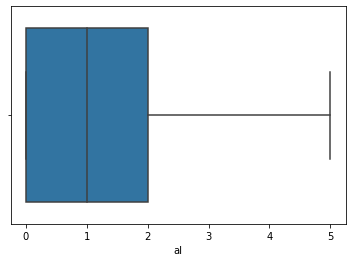

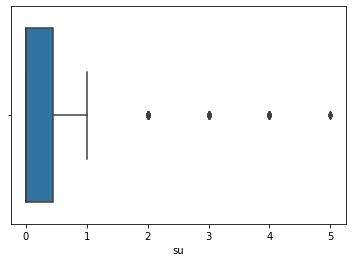

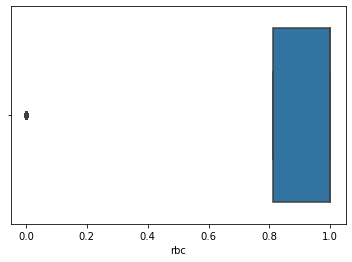

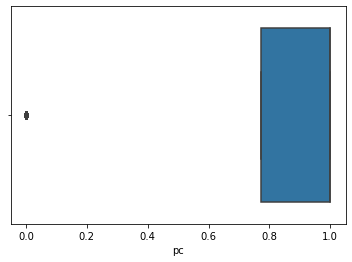

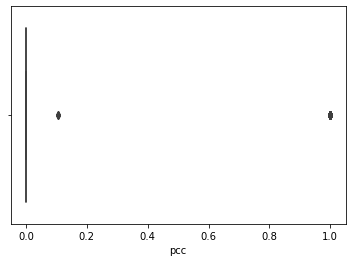

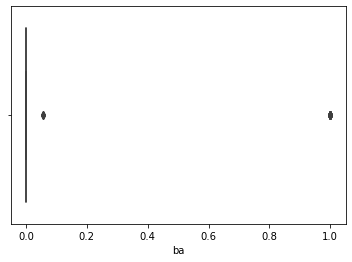

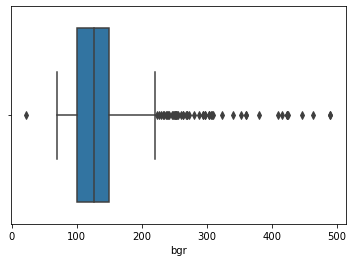

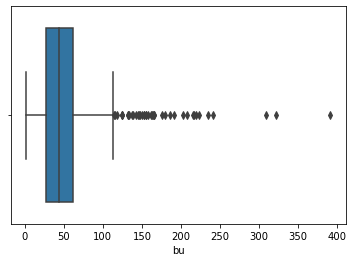

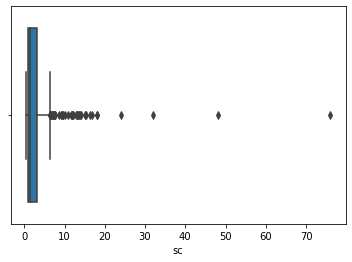

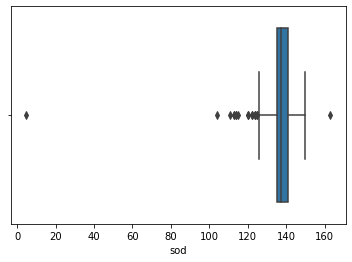

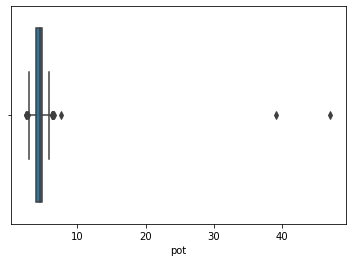

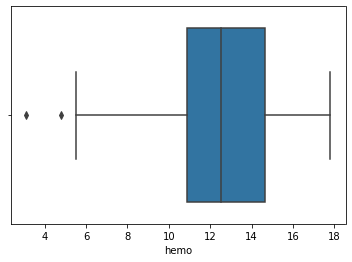

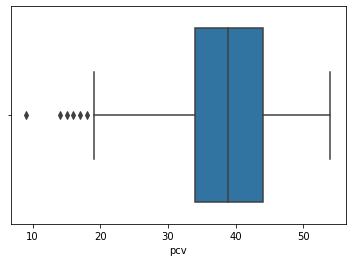

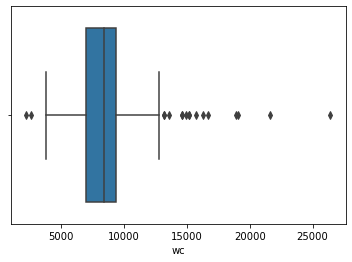

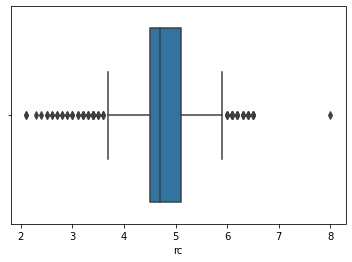

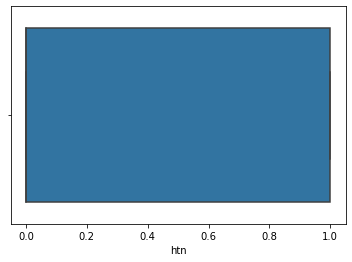

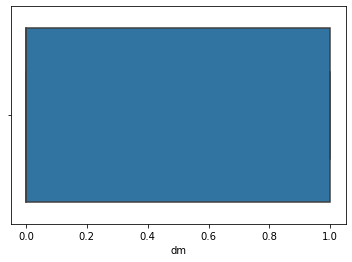

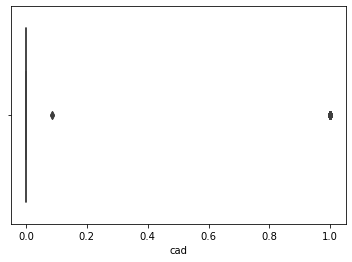

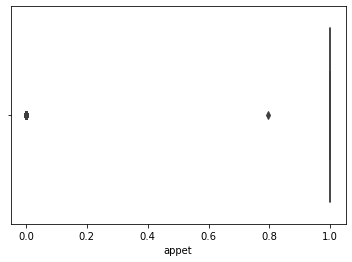

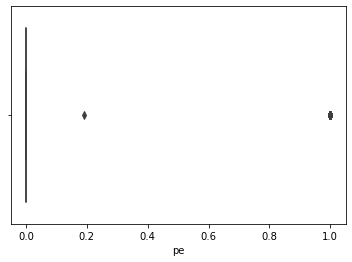

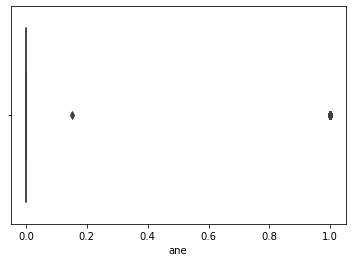

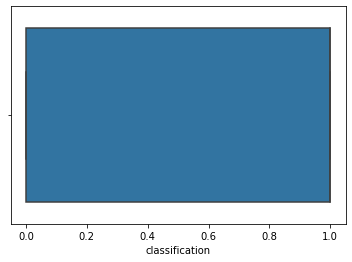

In [31]:
for column in df:
    sns.boxplot(df[column])
    plt.show()

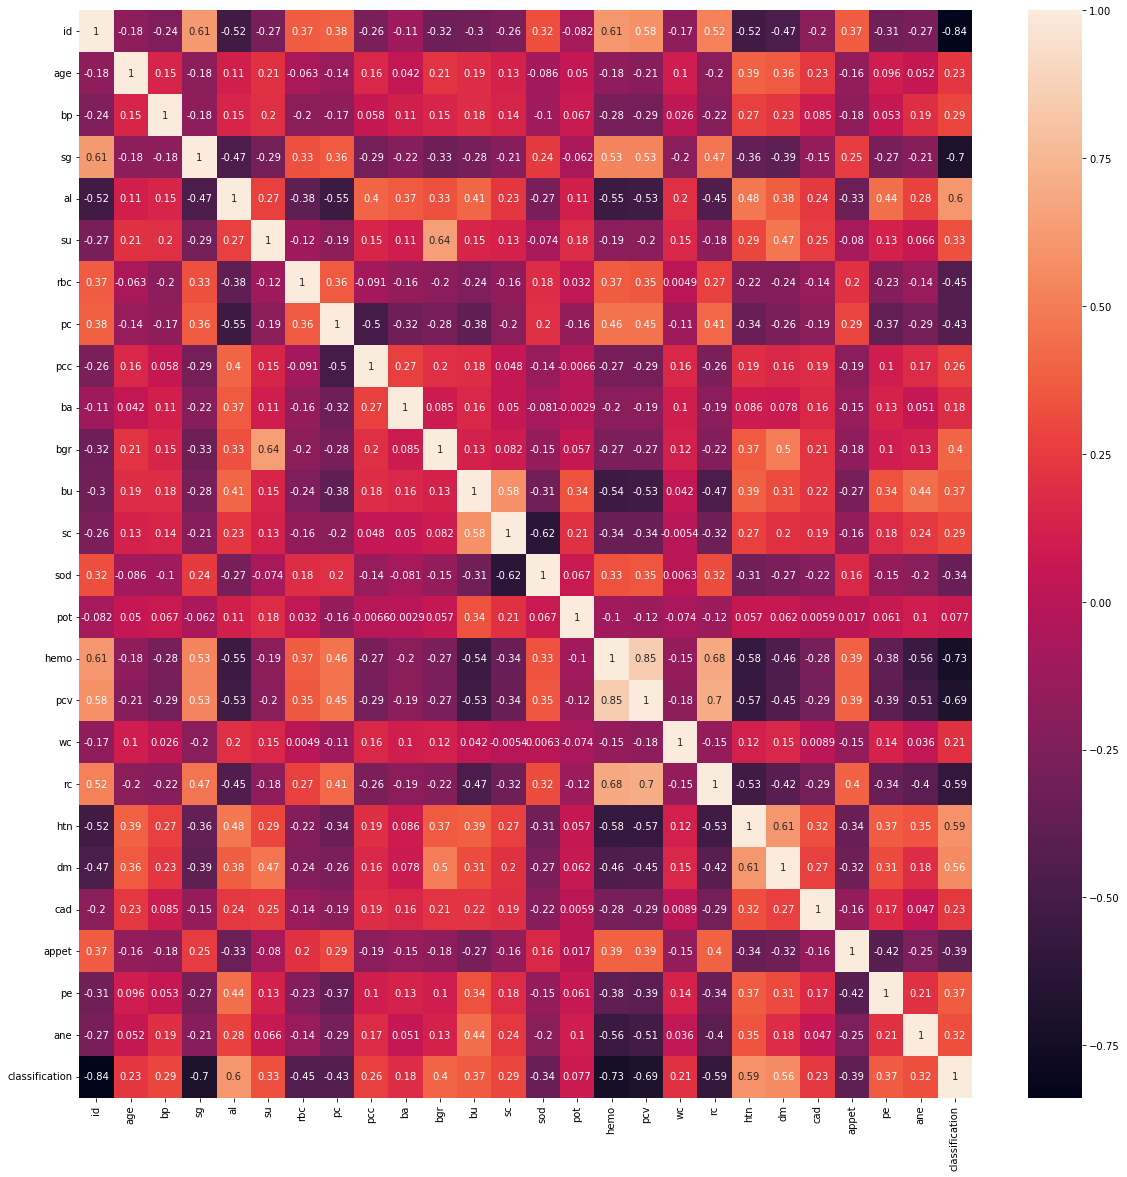

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
X=df.drop(['id', 'classification'], axis=1)
y=df['classification']

In [34]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [35]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({1: 250, 0: 250})


In [36]:
sc = StandardScaler()
X = sc.fit_transform(X_ros)
y = y_ros

In [37]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

In [38]:
pca = PCA(0.95)
X_PCA = pca.fit_transform(X)
print(X.shape)
print(X_PCA.shape)

(500, 24)
(500, 20)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y,test_size=0.2,random_state=0)
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (400, 20)
The shape of X_test is: (100, 20)
The shape of y_train is: (400,)
The shape of y_test is: (100,)


In [40]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [41]:
def model():
    
    classifier = Sequential()
    classifier.add(Dense(15, input_shape = (X_train.shape[1],), activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [42]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                315       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, verbose = 1)

Epoch 1/5
13/13 [==============================] - 1s 25ms/step - loss: 0.7694 - accuracy: 0.4750 - val_loss: 0.6628 - val_accuracy: 0.5900
Epoch 2/5
13/13 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5700 - val_loss: 0.5867 - val_accuracy: 0.7600
Epoch 3/5
13/13 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.6575 - val_loss: 0.5217 - val_accuracy: 0.8300
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.7175 - val_loss: 0.4613 - val_accuracy: 0.9000
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 0.4839 - accuracy: 0.7925 - val_loss: 0.4063 - val_accuracy: 0.9500


In [44]:
def plot_auc(t_y, p_y):
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label = 1)
    fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
    
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label = 1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)' % ('classification', aps))
    c_ax.plot(recall, precision, color = 'red', lw = 2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    
def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)
    
    f.add_subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label = 'val loss')
    plt.plot(history.history['loss'], label = 'train loss')
    plt.legend()
    plt.title('Model Loss')
    
    f.add_subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label = 'val accuracy')
    plt.plot(history.history['accuracy'], label = 'train accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()

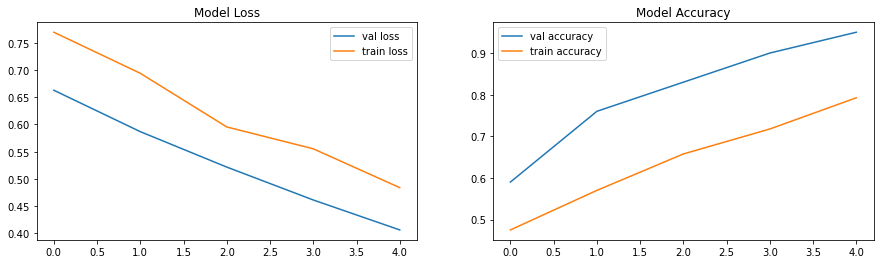

In [45]:
hist = plot_history(history)

4/4 [==============================] - 0s 2ms/step


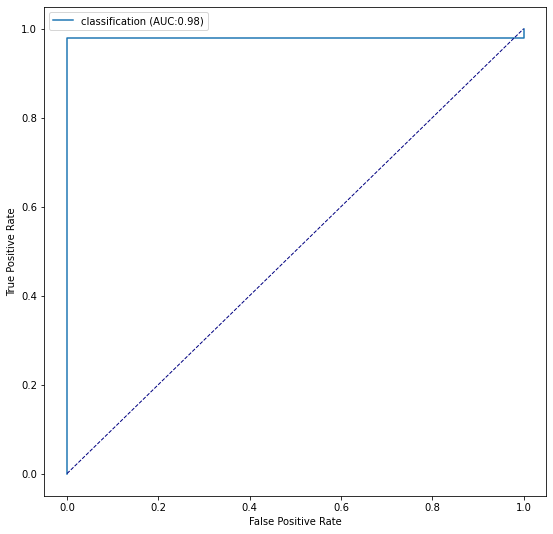

In [46]:
plot_auc(y_test, model.predict(X_test, verbose = True))

4/4 [==============================] - 0s 2ms/step


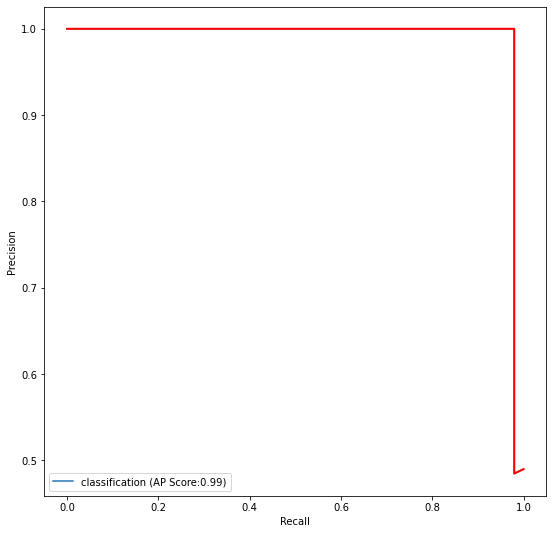

In [47]:
plot_precision_recall_curve_helper(y_test, model.predict(X_test, verbose = True))

In [48]:
def calc_f1(prec, recall):
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test, verbose = True))
f1score = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1score)

print('*****************************************************************************************')
print(f'Precision: {str(precision[idx])}')
print(f'Recall: {str(recall[idx])}')
print(f'Threshold: {str(thresholds[idx])}')
print(f'F1 Score: {str(f1score[idx])}')

4/4 [==============================] - 0s 2ms/step
*****************************************************************************************
Precision: 1.0
Recall: 0.9795918367346939
Threshold: 0.47714174
F1 Score: 0.9896907216494846


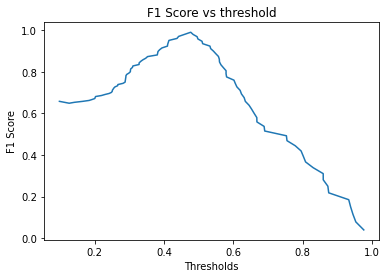

In [49]:
plt.figure()
plt.plot(thresholds, f1score)
plt.title('F1 Score vs threshold')
plt.xlabel('Thresholds')
plt.ylabel('F1 Score')
plt.show()